# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Divano Rizqi Anandra]
- **Email:** [divanorizqi@gmail.com]
- **ID Dicoding:** [divanora7]

Penjelasan tentang dataset Bike Sharing

---
[Bike Sharing](https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view)



1.   instant: record index
1.   dteday : date
1.   season : season

*   1 : spring
*   2 : summer
*   3 : fall
*   4 : winter

4.   yr : year ( 0 : 2011, 1 : 2012)
2.   mnth : month ( 1 to 12)
1.   hr : hour (0 to 23)
2.   holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
1.   weekday : day of the week
2.   workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
1.   weathersit : 
*   1 : Clear, Few clouds, Partly cloudy, Partly cloudy
*   2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*   3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
*   4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

11.   temp : Normalized temperature in Celsius. The values are divided to 41 (max)
1.   atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
1.   hum: Normalized humidity. The values are divided to 100 (max)
2.   windspeed: Normalized wind speed. The values are divided to 67 (max)
2.   casual: count of casual users
1.   registered: count of registered users
1.   cnt: count of total rental bikes including both casual and registered



















## Menentukan Pertanyaan Bisnis



*   Pertanyaan 1 : Apakah ada lonjakan signifikan dalam penyewaan pada musim tertentu?
*   Pertanyaan 2 : Musim mana yang memiliki jumlah penyewaan tertinggi dan terendah?
*   Pertanyaan 3 : Bagaimana pola penggunaan sepeda antara penyewa registered dan penyewa casual?



## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
data_day = pd.read_csv('data/day.csv')
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data_hour = pd.read_csv('data/hour.csv')
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Assessing **data_day**

In [4]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**


1.   Dataset ini mengunakan panda DataFrame
1.   Berisi 731 baris dan 16 kolom
2.   Semua kolom memiliki isi atau tidak ada kolom yang kosong
2.   Tipe data yang digunakan dalam dataset ini:
*   float64
*   int64
*   object
5.   memory yang digunakan yaitu 91,5+ KB


Berdasarkan hasil diatas dapat disimpulkan bahwa kesalahan yang ada pada dataset ini minim dan saya menemukan bahwa dteday mengunakan tipe data object yang seharusnya lebih optimal menggunakan tipe data datetime.









In [5]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
Dataset diatas memiliki 731 baris
Berdasarkan hasil describe diatas memiliki informasi berisi: 
*   Count atau total baris yang dimiliki 
*   Mean Values atau nilai rata-rata dari setiap kategori
*   Standard deviation yaitu nilai-nilai dalam dataset tersebar dari rata-rata. 
*   Nilai Minimun dan Maximum dari setiap kategori
*   Kuartil data yang memiliki 3 bagian yaitu 25%, 50%, dan 75%.






In [6]:
data_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
Seluruh kolom tidak memiliki kolom kosong

In [7]:
print("jumlah Duplikasi: ", data_day.duplicated().sum())

jumlah Duplikasi:  0


**Insight:** pada dataset data_day tidak memiliki data yang terindikasi duplikat

  Assessing **data_hour**

In [8]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**


1.   Dataset ini mengunakan panda DataFrame
1.   Berisi 17379 baris dan 17 kolom
2.   Semua kolom memiliki isi atau tidak ada kolom yang kosong
2.   Tipe data yang digunakan dalam dataset ini:
*   float64
*   int64
*   object
5.   memory yang digunakan yaitu 2.3+ MB

Berdasarkan hasil diatas dapat disimpulkan bahwa kesalahan yang ada pada dataset ini minim dan saya menemukan bahwa dteday mengunakan tipe data object yang seharusnya lebih optimal menggunakan tipe data datetime.

In [9]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Dataset diatas memiliki 17379 baris
Berdasarkan hasil describe diatas memiliki informasi berisi: 
*   Count atau total baris yang dimiliki 
*   Mean Values atau nilai rata-rata dari setiap kategori
*   Standard deviation yaitu nilai-nilai dalam dataset tersebar dari rata-rata. 
*   Nilai Minimun dan Maximum dari setiap kategori
*   Kuartil data yang memiliki 3 bagian yaitu 25%, 50%, dan 75%.

In [10]:
data_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
Seluruh kolom tidak memiliki kolom kosong

In [11]:
print("jumlah Duplikasi: ", data_hour.duplicated().sum())

jumlah Duplikasi:  0


**Insight:** pada dataset data_hour tidak memiliki data yang terindikasi duplikat

### Cleaning Data

Cleaning **data_day**

Menghapus kolom yang tidak digunakan

In [12]:
data_day = data_day.drop(columns=['workingday'])
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Merubah nama kolom agar lebih mudah untuk menganalisis kedepannya

In [13]:
data_day.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'total'
}, inplace=True)

data_day.head()

,instant,date,season,year,month,holiday,weekday,weather,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengonversi kode numerik ke label deskriptif, seperti 1 menjadi "Spring" dan 2 menjadi "Summer", dapat meningkatkan keterbacaan data serta mempermudah analisis dan visualisasi, sehingga lebih intuitif dan mudah dipahami.

In [14]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_mapping = {0: 2011, 1: 2012}
holiday_mapping = {0: 'No', 1: 'Yes'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
                 11: 'November', 12: 'December'}
weather_mapping = {1: 'Clear', 2: 'Cloudy', 3: 'Light Snow/Light Rain', 4: 'Heavy Rain/Snow'}

data_day['season'] = data_day['season'].map(season_mapping)
data_day['year'] = data_day['year'].map(year_mapping)
data_day['month'] = data_day['month'].map(month_mapping)
data_day['holiday'] = data_day['holiday'].map(holiday_mapping)
data_day['weekday'] = data_day['weekday'].map(weekday_mapping)
data_day['weather'] = data_day['weather'].map(weather_mapping)

data_day.head()

,instant,date,season,year,month,holiday,weekday,weather,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,Spring,2011,January,No,Saturday,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,No,Sunday,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,No,Monday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No,Tuesday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No,Wednesday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    object 
 3   year        731 non-null    int64  
 4   month       731 non-null    object 
 5   holiday     731 non-null    object 
 6   weekday     731 non-null    object 
 7   weather     731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  total       731 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 85.8+ KB


Merubah Tipe data yang tidak sesuai dengan tipe data yang seharusnya

In [16]:
data_day["date"] = pd.to_datetime(data_day["date"])

data_day[['season', 'year', 'month', 'holiday', 'weekday', 'weather']] = \
    data_day[['season', 'year', 'month', 'holiday', 'weekday', 'weather']].apply(pd.Categorical)

data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  total       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(4), int64(4)
memory usage: 57.1

Menghapus kolom yang tidak digunakan

In [17]:
data_hour = data_hour.drop(columns=['workingday'])
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


Merubah nama kolom agar lebih mudah untuk menganalisis kedepannya

In [18]:
data_hour.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'weathersit': 'weather',
    'cnt': 'total'
}, inplace=True)

data_hour.head()

,instant,date,season,year,month,hour,holiday,weekday,weather,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


Mengonversi kode numerik ke label deskriptif, seperti 1 menjadi "Spring" dan 2 menjadi "Summer", dapat meningkatkan keterbacaan data serta mempermudah analisis dan visualisasi, sehingga lebih intuitif dan mudah dipahami.

In [19]:
data_hour['season'] = data_hour['season'].map(season_mapping)
data_hour['year'] = data_hour['year'].map(year_mapping)
data_hour['month'] = data_hour['month'].map(month_mapping)
data_hour['holiday'] = data_hour['holiday'].map(holiday_mapping)
data_hour['weekday'] = data_hour['weekday'].map(weekday_mapping)
data_hour['weather'] = data_hour['weather'].map(weather_mapping)

data_hour.head()

,instant,date,season,year,month,hour,holiday,weekday,weather,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,Spring,2011,January,0,No,Saturday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No,Saturday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No,Saturday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No,Saturday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No,Saturday,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  total       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(4), int64(4)
memory usage: 57.1

Merubah Tipe data yang tidak sesuai dengan tipe data yang seharusnya

In [21]:
data_hour["date"] = pd.to_datetime(data_hour["date"])

data_hour[['season', 'year', 'month','hour' ,'holiday', 'weekday', 'weather']] = \
    data_hour[['season', 'year', 'month','hour' ,'holiday', 'weekday', 'weather']].apply(pd.Categorical)

data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   weather     17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  total       17379 non-null  int64         
dtypes: category(7), dateti

## Exploratory Data Analysis (EDA)


Total Rental per Musim

In [30]:
seasonal_rentals = data_day.groupby("season").agg({
    'total' : ['sum','max','min','mean'],
    'temp' : ['sum', 'max','min','std']
    })
seasonal_rentals

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36880\3346396420.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = data_day.groupby("season").agg({


total                                 temp                      \
            sum   max   min         mean         sum       max       min   
season                                                                     
Fall    1061129  8714  1115  5644.303191  132.786150  0.861667  0.469167   
Spring   471348  7836   431  2604.132597   53.892306  0.572500  0.059130   
Summer   918589  8362   795  4992.331522  100.170549  0.808333  0.253043   
Winter   841613  8555    22  4728.162921   75.277275  0.657500  0.220833   

                  
             std  
season            
Fall    0.070848  
Spring  0.102735  
Summer  0.122650  
Winter  0.107834

Berdasakan Kategori Total


*   Fall memiliki jumlah total tertinggi (1.061.129), diikuti oleh Summer (918.589) dan Winter (841.613), sedangkan Spring memiliki jumlah total terendah (471.348).
*   Max (nilai maksimum) untuk total juga tertinggi di Fall (8714), sedangkan Spring memiliki max terendah (7836).
*   Min (nilai minimum) terendah terdapat di Winter (22), sementara tertinggi di Fall (1115).
*   Rata-rata (mean) tertinggi terdapat di Fall (5644.30) dan terendah di Spring (2604.13), yang menunjukkan bahwa Fall memiliki jumlah total yang lebih tinggi secara konsisten.

Berdasarkan Temp (Suhu)
*   Total sum suhu tertinggi berada di Fall (132.78), diikuti oleh Summer (100.17) dan Winter (75.28). Spring memiliki total suhu terendah (53.89).
*   Nilai maksimum suhu tertinggi terdapat di Fall (0.861667), sedangkan Spring memiliki max suhu terendah (0.572500).
*   Nilai minimum suhu terendah ada di Spring (0.059130), menunjukkan suhu terendah lebih ekstrem dibandingkan musim lainnya.
*   Standar deviasi (std) tertinggi terdapat di Summer (0.122650), yang menunjukkan variabilitas suhu yang lebih besar dibandingkan musim lain.



Total rental terbanyak dan terendah per musim

In [23]:
for season, values in seasonal_rentals.iterrows():
    highest_rental = values[('total', 'max')]  # Nilai tertinggi dalam musim
    lowest_rental = values[('total', 'min')]   # Nilai terendah dalam musim
    highest_season_idx = seasonal_rentals[('total', 'sum')].idxmax()
    lowest_season_idx = seasonal_rentals[('total', 'sum')].idxmin()

    print(f"Pada musim {season}:")
    print(f"  - Total rental tertinggi per hari yaitu: {highest_rental}")
    print(f"  - Total rental terendah per hari yaitu: {lowest_rental}")
    print()

print(f"Total rental terbanyak terjadi pada musim {highest_season_idx} dengan {seasonal_rentals.loc[highest_season_idx, ('total', 'sum')]} penyewaan.")
print(f"Total rental terendah terjadi pada musim {lowest_season_idx} dengan {seasonal_rentals.loc[lowest_season_idx, ('total', 'sum')]} penyewaan.")

Pada musim Fall:
  - Total rental tertinggi per hari yaitu: 8714.0
  - Total rental terendah per hari yaitu: 1115.0

Pada musim Spring:
  - Total rental tertinggi per hari yaitu: 7836.0
  - Total rental terendah per hari yaitu: 431.0

Pada musim Summer:
  - Total rental tertinggi per hari yaitu: 8362.0
  - Total rental terendah per hari yaitu: 795.0

Pada musim Winter:
  - Total rental tertinggi per hari yaitu: 8555.0
  - Total rental terendah per hari yaitu: 22.0

Total rental terbanyak terjadi pada musim Fall dengan 1061129 penyewaan.
Total rental terendah terjadi pada musim Spring dengan 471348 penyewaan.


In [24]:
hourly_usage = data_hour.groupby("hour")[["casual", "registered"]].mean()
hourly_usage

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36880\2530363508.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_usage = data_hour.groupby("hour")[["casual", "registered"]].mean()


,casual,registered
hour,,
0,10.158402,43.739669
1,6.504144,26.871547
2,4.772028,18.097902
3,2.715925,9.011478
4,1.253945,5.098996
5,1.411437,18.478382
6,4.161379,71.882759
7,11.055021,201.009629
8,21.679505,337.331499


In [25]:
hourly_usage_casual = hourly_usage.sort_values(['casual'], ascending=False)

hourly_usage_casual

,casual,registered
hour,,
14,75.567901,165.381344
15,74.905350,176.327846
17,74.273973,387.178082
16,73.745205,238.238356
13,72.308642,181.352538
12,68.293956,185.021978
18,61.120879,364.390110
11,59.540578,148.602476
19,48.770604,262.752747


**Insight:**

Berdasarkan waktu yaitu jam kita dapat melihat penyewa casual aktif di jam 14 dalam menyewa sepeda

In [26]:
hourly_usage_reg = hourly_usage.sort_values(['registered'], ascending=False)
hourly_usage_reg.head()

,casual,registered
hour,,
17,74.273973,387.178082
18,61.120879,364.390110
8,21.679505,337.331499
19,48.770604,262.752747
16,73.745205,238.238356


**Insight:**

Berdasarkan waktu yaitu jam kita dapat melihat penyewa registered aktif di jam 17 dalam menyewa sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada lonjakan signifikan dalam penyewaan pada musim tertentu?


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36880\3320220827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = data_day.groupby("season")["total"].sum().reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36880\3320220827.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="season", y="total", data=seasonal_rentals, palette="coolwarm")


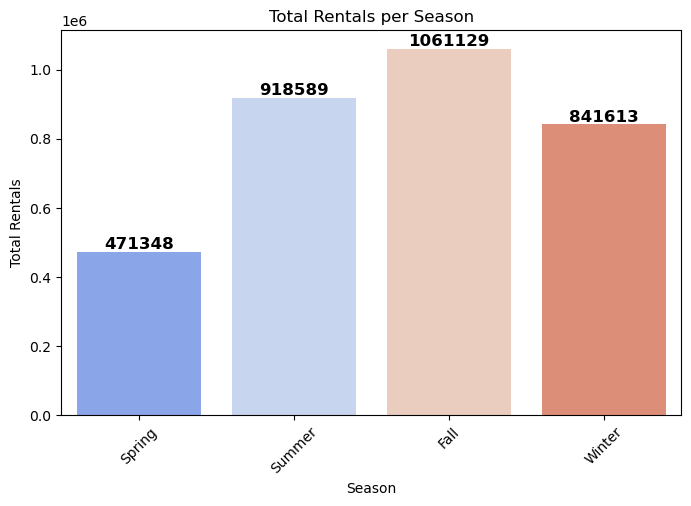

In [27]:
seasonal_rentals = data_day.groupby("season")["total"].sum().reset_index()

# Sort seasons for better readability
season_order = ["Spring", "Summer", "Fall", "Winter"]
seasonal_rentals["season"] = pd.Categorical(seasonal_rentals["season"], categories=season_order, ordered=True)
seasonal_rentals = seasonal_rentals.sort_values("season")

# Plot with value labels
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="season", y="total", data=seasonal_rentals, palette="coolwarm")

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.title("Total Rentals per Season")
plt.xticks(rotation=45)
plt.show()

Berdasarkan hasil grafik diatas dapat disimpulkan bahwa terdapat lonjakan penyewa sepeda pada musim summer ke fall yang dimana musim tersebut memiliki suhu yang lebih hangat sehingga hal tersebut menjadikan faktor bahwa banyak sekali orang yang menyewa sepeda.

### Pertanyaan 2: Musim mana yang memiliki jumlah penyewaan tertinggi dan terendah?




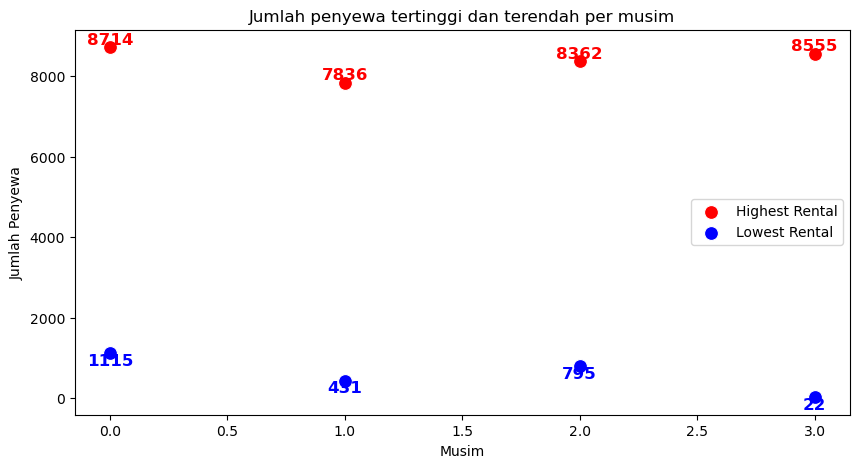

In [32]:
seasonal_rentals["season"] = range(len(seasonal_rentals))
# Buat scatter plot
plt.figure(figsize=(10, 5))
ax = plt.gca()

# Plot titik tertinggi dan terendah
sns.scatterplot(x=seasonal_rentals["season"], y=seasonal_rentals[("total", "max")], 
                color="red", s=100, label="Highest Rental", ax=ax)
sns.scatterplot(x=seasonal_rentals["season"], y=seasonal_rentals[("total", "min")], 
                color="blue", s=100, label="Lowest Rental", ax=ax)

# Tambahkan label angka di atas titik scatter
for i in range(len(seasonal_rentals)):
    # Label untuk nilai tertinggi
    ax.annotate(f'{int(seasonal_rentals.iloc[i][("total", "max")])}', 
                (seasonal_rentals["season"].iloc[i], seasonal_rentals.iloc[i][("total", "max")]), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='red')

    # Label untuk nilai terendah
    ax.annotate(f'{int(seasonal_rentals.iloc[i][("total", "min")])}', 
                (seasonal_rentals["season"].iloc[i], seasonal_rentals.iloc[i][("total", "min")]), 
                ha='center', va='top', fontsize=12, fontweight='bold', color='blue')

plt.title("Jumlah penyewa tertinggi dan terendah per musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewa")
plt.legend()
plt.show()

Berdasarkan grafik diatas memiliki angka terbesar perharinya yaitu 8714 penyewa yang berada pada musim fall dan penyewa terendah dalam 1 hari yaitu 22 dan berada pada musim winter

### Pertanyaan 3 : Bagaimana pola penggunaan sepeda antara penyewa registered dan penyewa casual?

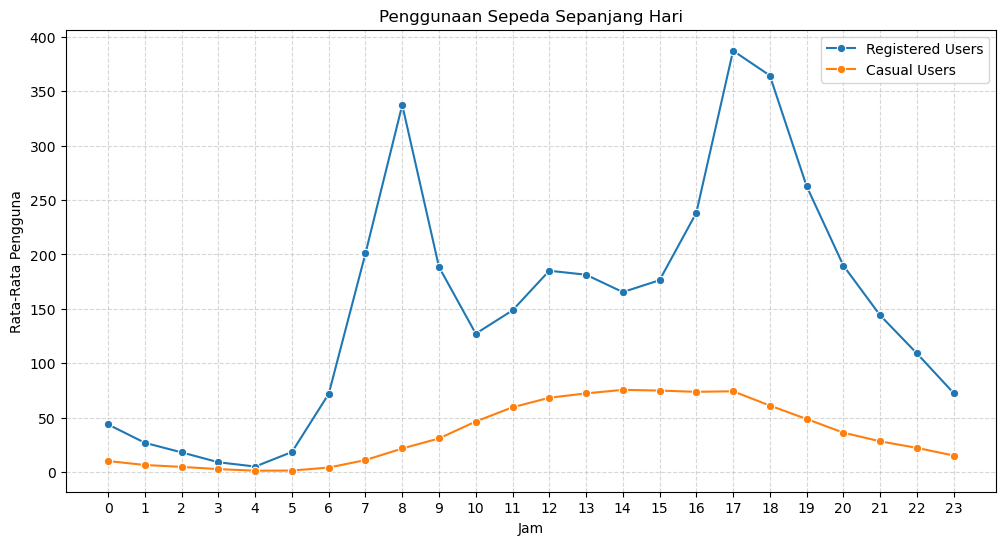

In [33]:
hourly_usage["hour"] = range(len(hourly_usage))
# Reset index agar 'hour' menjadi kolom
hourly_usage = hourly_usage.reset_index(drop=True)

# Warna untuk grafik
colors = ["#1f77b4", "#ff7f0e"]  # Biru untuk registered, oranye untuk casual

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_usage, x="hour", y="registered", label="Registered Users", color=colors[0], marker="o")
sns.lineplot(data=hourly_usage, x="hour", y="casual", label="Casual Users", color=colors[1], marker="o")

plt.title("Penggunaan Sepeda Sepanjang Hari")
plt.xlabel("Jam")
plt.ylabel("Rata-Rata Pengguna")
plt.legend()
plt.xticks(range(0, 24, 1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

berdasarkan grafik diatas, dapat disipulkan bahwa pola jam pada penyewa casual memiliki angka tertinggi pada jam 14 dan terendah pada jam 4.
Pola penyewa registered memiliki angka tertinggi pada jam 17 dan angka terendah pada jam 4.

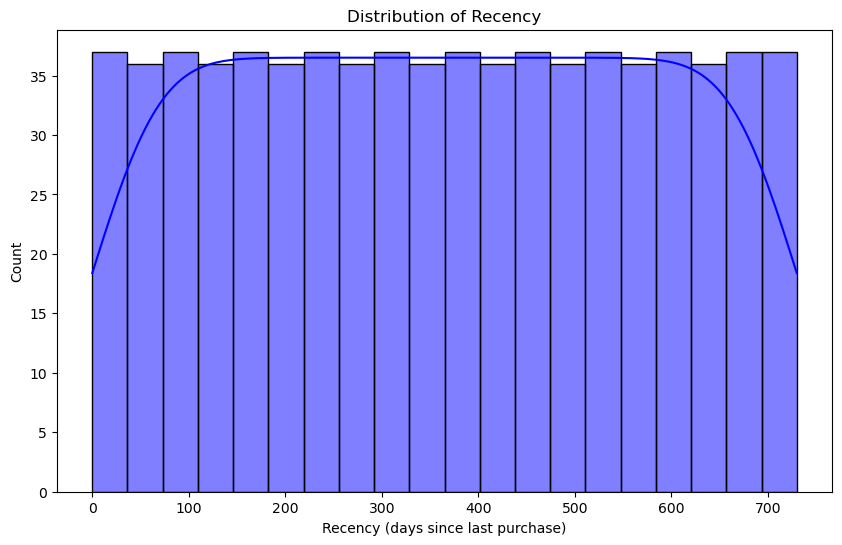

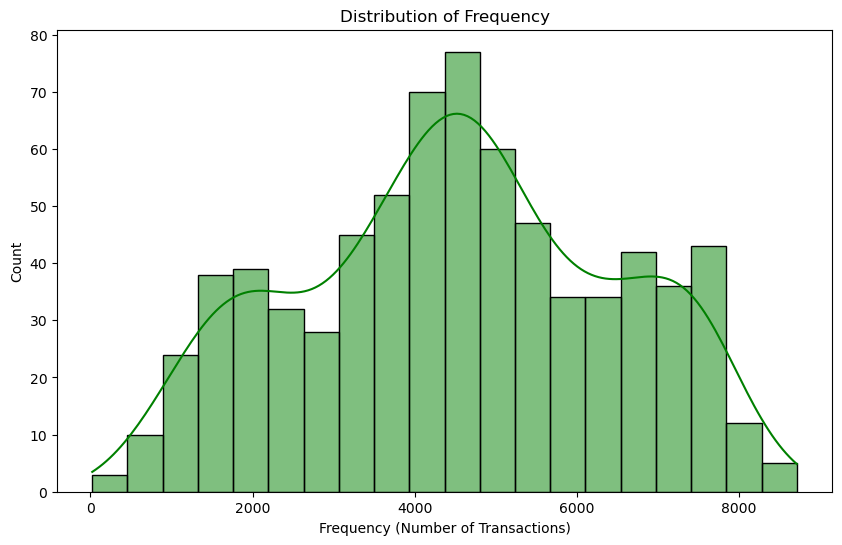

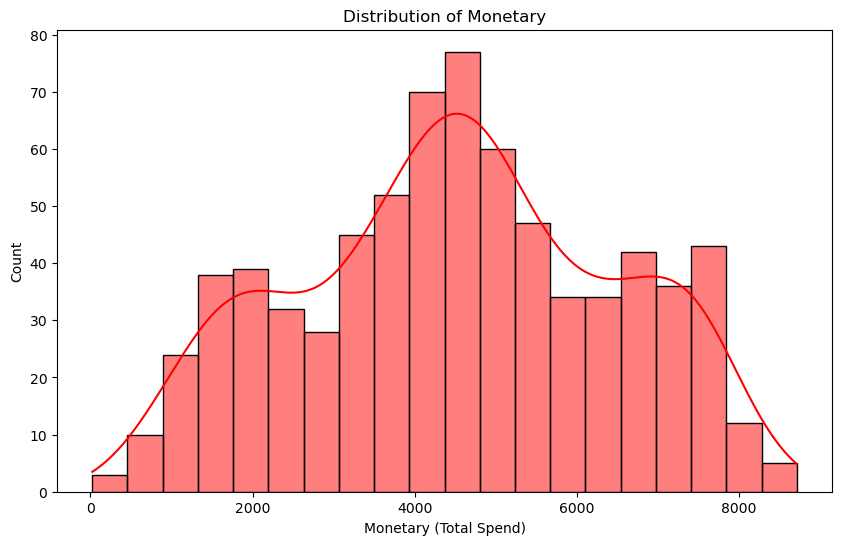

,date,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,2011-01-01,730,985,985,1,1,1,111
1,2011-01-02,729,801,801,1,1,1,111
2,2011-01-03,728,1349,1349,1,1,1,111
3,2011-01-04,727,1562,1562,1,1,1,111
4,2011-01-05,726,1600,1600,1,1,1,111


In [34]:
# RFM Analysis
latest_date = data_hour["date"].max()
daily_data = data_hour.groupby("date")["total"].sum().reset_index()
rfm = daily_data.copy()
rfm["Recency"] = (latest_date - rfm["date"]).dt.days
rfm["Frequency"] = rfm["total"]
rfm["Monetary"] = rfm["total"]
rfm = rfm[["date", "Recency", "Frequency", "Monetary"]]

# Segmentasi berdasarkan kuartil
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"], 4, labels=[1, 2, 3, 4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4])
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

# Visualisasi Recency
plt.figure(figsize=(10, 6))
sns.histplot(rfm["Recency"], bins=20, kde=True, color="blue")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Count")
plt.title("Distribution of Recency")
plt.show()

# Visualisasi Frequency
plt.figure(figsize=(10, 6))
sns.histplot(rfm["Frequency"], bins=20, kde=True, color="green")
plt.xlabel("Frequency (Number of Transactions)")
plt.ylabel("Count")
plt.title("Distribution of Frequency")
plt.show()

# Visualisasi Monetary
plt.figure(figsize=(10, 6))
sns.histplot(rfm["Monetary"], bins=20, kde=True, color="red")
plt.xlabel("Monetary (Total Spend)")
plt.ylabel("Count")
plt.title("Distribution of Monetary")
plt.show()

# Output RFM Results
rfm.head()

### Recency
* Grafik menunjukkan bahwa sebagian besar data memiliki Recency yang tinggi, artinya banyak pelanggan atau transaksi terjadi dalam waktu yang lama sejak tanggal terakhir dalam dataset.

###  Frequency
* Grafik menunjukkan bahwa sebagian besar pelanggan atau hari memiliki jumlah transaksi yang relatif rendah.
* Hanya sedikit hari yang memiliki jumlah transaksi tinggi, menunjukkan adanya beberapa hari dengan lonjakan aktivitas.
* Pola ini bisa disebabkan oleh faktor musiman, promosi, atau hari-hari tertentu dengan permintaan tinggi.

###  Monetary
* Grafik ini memiliki pola yang mirip dengan Frequency karena dalam dataset ini Monetary dihitung dari jumlah total transaksi.
* Mayoritas pelanggan atau hari memiliki nilai transaksi yang rendah, sementara hanya sebagian kecil memiliki transaksi yang tinggi.

In [35]:
data_hour.to_csv("dashboard/main_data.csv", index=False)

## Conclusion

- Penyewa pada musim gugur memiliki angka yang tertinggi dibandingkan dengan musim lain dan pada musim gugur juga memiliki angka penyewa harian terbanyak dan pada musim salju memiliki angka terendah untuk penyewa harian.
- Jumlah penyewa terdaftar memiliki angka yang tinggi daripada angka penyewa kasual.
- Penyewa terdaftar sangat banyak pada jam 17 dan memiliki sedikit penyewa pada jam 4
- Penyewa kasual sangat aktif pada jam 14 dan sangat sedikit pada jam 4.